In [8]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Load the data

In [3]:

df = pd.read_csv('../data/raw_analyst_ratings.csv')

Perform sentiment analysis on headlines

In [4]:

df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [6]:
# Display sentiment counts
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

sentiment_label
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


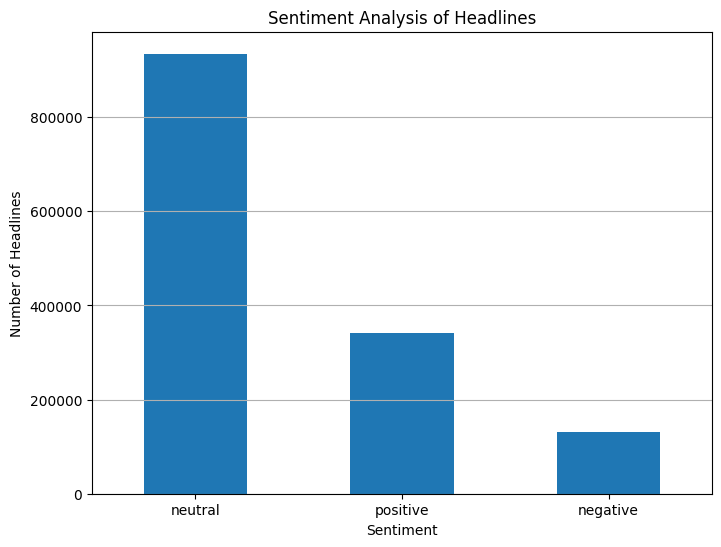

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [11]:
# Topic Modeling - Identifying common keywords or phrases
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['headline'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [12]:
def get_top_words(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return topics


In [16]:
feature_names = vectorizer.get_feature_names_out()
topics = get_top_words(lda, feature_names, 10)

In [27]:
# Display the results
print("\nTopics:\n", topics)



Topics:
 {'Topic 1': ['earnings', 'stocks', 'benzinga', 'scheduled', 'etfs', 'watch', 'etf', '2018', '2019', '10'], 'Topic 2': ['shares', 'trading', 'stocks', 'says', 'companies', 'higher', 'week', 'stock', 'lower', '52'], 'Topic 3': ['vs', 'est', 'eps', 'reports', 'sales', 'pt', 'buy', 'raises', 'maintains', 'target'], 'Topic 4': ['new', 'stocks', 'announces', 'week', '52', 'reports', 'industry', 'set', 'highest', 'low'], 'Topic 5': ['market', 'mid', 'stocks', 'update', 'session', 'moving', 'day', 'benzinga', 'biggest', 'downgrades']}
